<center><h1>Modelo Polinomial</h1></center>
<h3>Definición</h3>

- En estadística, la regresión polinomial es una forma de regresión lineal en la que la relación entre la variable independiente "x" y la variable dependiente "y" es modelada como un polinomio de grado n en x.

<h3>Realización del modelo</h3>

- Como primer paso importamos las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import time
import datetime
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt

%matplotlib inline

- Luego se lee los datos o información de los paises con respecto a COVID-19 del siguiente link:

<center><a href="https://covid.ourworldindata.org/data/owid-covid-data.csv">https://covid.ourworldindata.org/data/owid-covid-data.csv</a><center>

In [2]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

data = pd.read_csv(url).fillna(0)
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-01-23,0.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-24,0.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-25,0.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-26,0.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-27,0.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61049,ZWE,Africa,Zimbabwe,2020-12-02,10129.0,0.0,88.714,277.0,0.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
61050,ZWE,Africa,Zimbabwe,2020-12-03,10424.0,295.0,114.429,280.0,3.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
61051,ZWE,Africa,Zimbabwe,2020-12-04,10547.0,123.0,119.000,281.0,1.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
61052,ZWE,Africa,Zimbabwe,2020-12-05,10617.0,70.0,113.571,291.0,10.0,2.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


- Ahora se debe recuperar la información necesaria solo del país Ecuador con total de casos mayores a 0

In [3]:
data = data.loc[(data['location'] == 'Ecuador') & (data['total_cases'] != 0)]
data = data[['date','total_cases','total_deaths','location']]
x=np.arange(1,len(data)+1,1) # número del dia
y=np.array(data.values[:,1]) # número de casos
y1=np.array(data.values[:,2])
FMT = '%Y-%m-%d'
date = data['date']
data['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
data= data[data["date"] > 0]
data

,date,total_cases,total_deaths,location
15989,60,6.0,0.0,Ecuador
15990,61,6.0,0.0,Ecuador
15991,62,7.0,0.0,Ecuador
15992,63,10.0,0.0,Ecuador
15993,64,13.0,0.0,Ecuador
...,...,...,...,...
16265,336,194876.0,13562.0,Ecuador
16266,337,195884.0,13612.0,Ecuador
16267,338,196482.0,13696.0,Ecuador
16268,339,197391.0,13756.0,Ecuador


- Ahora se procede a graficar los datos

           4            3         2
6.715e-06 x - 0.007553 x + 3.421 x + 208.3 x - 3887


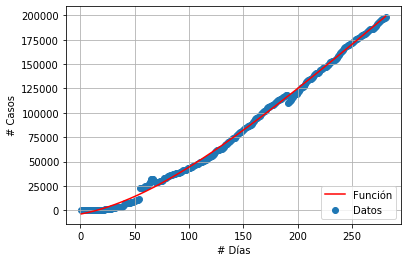

In [9]:
x = np.arange(1,len(data)+1,1, dtype='float') # número de dias
y = np.array(data.values[:,1], dtype='float') # número de casos

fun1 = np.poly1d(np.polyfit(x, y, 4))

print(fun1)

plt.scatter(x, y)  
plt.plot(x, fun1(x), c='r')  
plt.ylabel('# Casos')
plt.xlabel('# Días')
plt.legend(['Función','Datos'], loc='lower right')
plt.grid(True)

plt.show()

           4            3         2
6.715e-06 x - 0.007553 x + 3.421 x + 208.3 x - 3887


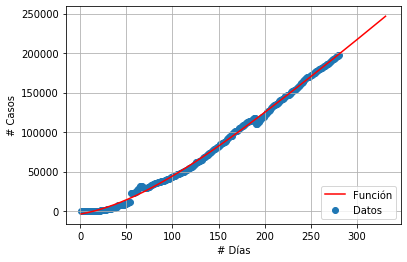

In [11]:
fun1 = np.poly1d(np.polyfit(x, y, 4))
print(fun1)
plt.scatter(x, y) 
x1 = np.arange(1, len(data) + 51, 1, dtype='float')
plt.plot(x1, fun1(x1), c='r') 
plt.ylabel('# Casos')
plt.xlabel('# Días')
plt.legend(['Función','Datos'], loc='lower right')
plt.grid(True)
plt.show()

<h3>Referencias</h3>

- https://aprendeia.com/algoritmo-regresion-polinomial-machine-learning-practica-con-python/
- https://www.iartificial.net/regresion-polinomica-en-python-con-scikit-learn/